# TFE4580 Questionnaire Data Analysis 📊❓💻

This notebook 📒 is a part of Peter Remøy Paulsens 🙋‍♂️specialization project Fall 2020, TFE4580.

Here you can see the code used for the resulting analysis used in the final project report 📚📖

Before and after testing the experimental application, the participants of this experiment filled out a pre-testing questionnaire and a post-testing questionnaire used to collect data on their experience.

---
We are going to utilize the two csv files placed in this directory which have been exported from the questionnaires
* pre_testing_questionnaire.csv
* post_testing_questionnaire.csv

Lets check if the files are placed in our directory



In [63]:
import os

print(os.getcwd())      # Tells us which directory we are in
print(os.listdir())     # Lists all of the contents in our directory

/content
['.config', 'post_testing_questionnaire_numerical.csv', 'pre_testing_questionnaire.csv', 'post_testing_questionnaire.csv', 'post_testing_questionnaire_numerical_immersion.csv', 'post_testing_questionnaire_numerical_emotions.csv', 'post_testing_questionnaire_numerical_usability.csv', 'post_testing_questionnaire_numerical_experience.csv', '.ipynb_checkpoints', 'sample_data']


You should see something like this printed out:
```
['.config', 'post_testing_questionnaire.csv', 'pre_testing_questionnaire.csv']
```
---
## Analyzing Tool 🕵️‍♀️🐼🔎
### Importing Data 🤏
We will use [pandas](https://pandas.pydata.org) as our analyzing tool. We import this and name it **pd**.

In [24]:
import pandas as pd

Then we go on to making a panda DataFrames which reads our csv file

Let's call our Pre Testing Questionnaire DataFrame **df_pre** and see if it reads properly

In [59]:
df_pre = pd.read_csv('pre_testing_questionnaire.csv')
df_pre.head()

,Tidsmerke,What is you participant number? You will get this from the experimenter,How old are you?,Gender,Do you have any previous experience with gaming?,Do you have any previous experience with augmented reality?,"If you have any experience with augmented reality, which kind of device have you been using?"
0,2020/11/29 2:15:05 p.m. CET,3NKB,18 - 24,Male,I do it irregulary (here and there),No experience,NaN
1,2020/11/30 9:17:11 a.m. CET,AAAN,18 - 24,Male,I do it regularly,I've tried it before (once or twice),Mobile or tablet
2,2020/11/30 10:35:36 a.m. CET,809O,18 - 24,Female,I do it irregulary (here and there),I've tried it before (once or twice),Mobile or tablet
3,2020/11/30 11:08:55 a.m. CET,0DG6,18 - 24,Male,I do it regularly,No experience,NaN
4,2020/11/30 12:09:41 p.m. CET,9l7k,18 - 24,Male,I do it irregulary (here and there),I've tried it before (once or twice),Head mounted unit (such as HoloLens or Magic L...


We can then call our Post Testing Questionnaire DataFrame **df_post** and see if it also reads properly

In [26]:
df_post = pd.read_csv('post_testing_questionnaire.csv')
df_post.head()


,Tidsmerke,What is you participant number? You will get this from the experimenter,What environment did you use during the experiment?,How unhappy or happy did you feel while using the application?,How calm or excited did you feel while using the application?,How little or much control did you feel you had while using the application?,I thought the application was easy to use,I thought the application was inconsistent,I felt confident using the application,I was immersed into the mobile screen environment,I felt seperated from the real-world environment,I did not feel the need to look at anything other than the mobile screen,The visuals of the virtual object were convincing,I felt I could control the virtual object,The virtual object blended nicely into the environment,The object disappeared behind other real world objects,"I felt that I experienced the virtual object, rather than watching it",I enjoyed the overall experience with the application,"I would like to try the application, or similar applications again"
0,2020/11/29 2:24:28 p.m. CET,3NKB,Environment 1,7,9,6,Agree,Neutral,Agree,Strongly Agree,Disagree,Agree,Agree,Agree,Agree,Neutral,Agree,Agree,Strongly agree
1,2020/11/30 9:23:25 a.m. CET,AAAN,Environment 1,8,8,9,Agree,Strongly Disagree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Agree
2,2020/11/30 10:45:18 a.m. CET,809O,Environment 2,9,8,7,Strongly Agree,Disagree,Disagree,Disagree,Disagree,Agree,Agree,Neutral,Disagree,Strongly Disagree,Neutral,Agree,Agree
3,2020/11/30 11:15:10 a.m. CET,0DG6,Environment 2,8,3,8,Strongly Agree,Strongly Disagree,Strongly gree,Agree,Disagree,Strongly Agree,Agree,Strongly Agree,Agree,Disagree,Neutral,Agree,Strongly agree
4,2020/11/30 12:15:52 p.m. CET,9l7k,Environment 1,5,3,9,Agree,Agree,Strongly agree,Disagree,Disagree,Agree,Agree,Agree,Strongly Agree,Agree,Neutral,Agree,Agree


### Demographic (pre-testing) 💁‍♂️👵🌍👧🙋‍♀️
Lets see what kind of people we have been testing in the experiment

##### Distribution of Age


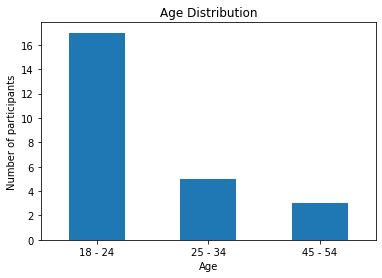

In [60]:
df_pre['How old are you?'].value_counts().plot(kind="bar", title="Age Distribution", ylabel="Number of participants", xlabel="Age", rot=0)


##### Distribution of gender

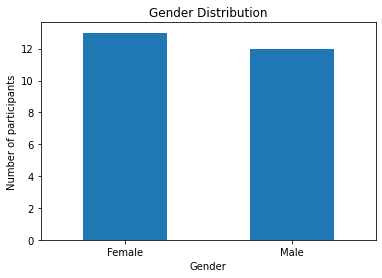

In [61]:
df_pre['Gender'].value_counts().plot(kind="bar", title="Gender Distribution", ylabel="Number of participants", xlabel="Gender", rot=0)



##### Distribution of Gaming Experience
It is also interesting to see what kind of experience the participants have with gaming. 

Note that gaming can be everything from being world champion in Fortnite, to being the best at Candy Crush in you county. 

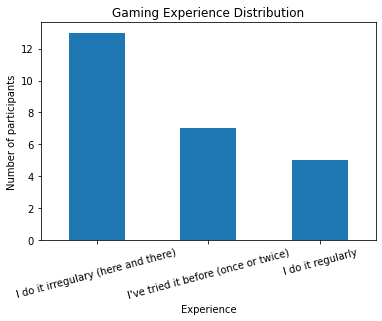

In [62]:
plot = df_pre['Do you have any previous experience with gaming?'].value_counts().plot(kind="bar", title="Gaming Experience Distribution", ylabel="Number of participants", xlabel="Experience", rot=15)


##### Distribution of AR experience

This is a hard one, as most people think of specific AR applications when they get asked weather or not if they have any experience with AR, and most people forget that AR is implemented in popular apps such as Snapchat 

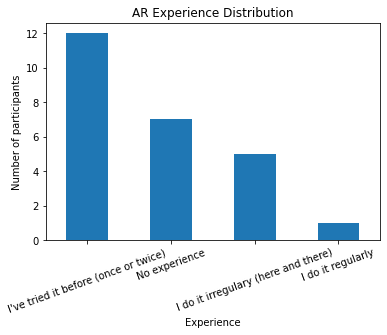

In [30]:
plot = df_pre['Do you have any previous experience with augmented reality?'].value_counts().plot(kind="bar", title="AR Experience Distribution", ylabel="Number of participants", xlabel="Experience", rot=20)


### Experience (post-testing) 🧐🤯🤔

Lets now take a look on the questionnaire answers from the post-testing.

#### Making answers numerical 🔢
A small problem with the original answers, is that some of the answers has text answers. This was to make it easier for the participants to answer the questionnaire. But, to make it easier to analyze the data, we'll have to convert the data to numerical values

*   5  ⬅️  Strongly Agree
*   4  ⬅️  Agree
*   3  ⬅️  Neutral
*   2  ⬅️  Disagree
*   1  ⬅️  Strongly Disagree

Exporting to a new CSV file with numerical values


In [31]:
# Converting the text answers to numbers
df_post.replace(to_replace="Strongly Agree", value=5, inplace=True)
df_post.replace(to_replace="Agree", value=4, inplace=True)
df_post.replace(to_replace="Neutral", value=3, inplace=True)
df_post.replace(to_replace="Disagree", value=2, inplace=True)
df_post.replace(to_replace="Strongly Disagree", value=1, inplace=True)

# Dealing with some wrong variations in the questionnaire
df_post.replace(to_replace="Strongly agree", value=5, inplace=True)
df_post.replace(to_replace="Strongly gree", value=5, inplace=True)

# Exporting to a new numerical csv file
df_post.to_csv('post_testing_questionnaire_numerical.csv', index=False)


Let's make a new DataFrame with the numerical CSV sheet

In [32]:
df_num = pd.read_csv('post_testing_questionnaire_numerical.csv')

Let's see the distrobution of who tried which environments

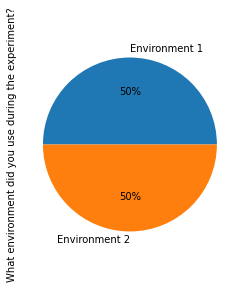

In [33]:
df_num['What environment did you use during the experiment?'].value_counts().plot(kind="pie", autopct='%.f%%')

Perfect! 50/50! 🥳

Lets seperate the two environment answers into two variables and quickly take a look at the difference in the mean of the two different environmnets score of immersion

In [34]:
environment_1 = df_num[df_num['What environment did you use during the experiment?'] == 'Environment 1']
environment_2 = df_num[df_num['What environment did you use during the experiment?'] == 'Environment 2']

print(environment_1['I was immersed into the mobile screen environment'].mean(), environment_2['I was immersed into the mobile screen environment'].mean())

3.8333333333333335 3.75


Great! But this is not very visually pleasing 🤔

Lets plot all of the mean of the answers in a histogram to please the human need for great visuals! 🤤

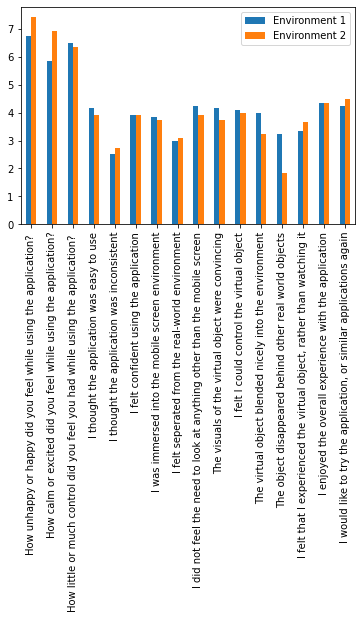

In [35]:
pd.concat([df_num[df_num['What environment did you use during the experiment?'] == 'Environment 1'].mean().rename('Environment 1'), df_num[df_num['What environment did you use during the experiment?'] == 'Environment 2'].mean().rename('Environment 2')], axis=1).plot.bar()

This is a bit messy and crowded😬 Especially the looong questions...

Lets seperate the main dataset into smaller categorized datasets 🤩

We import numpy to be able to use .r_ to combine slices and indices, as we need the data for which environment has been used in each of the categories. 

In [53]:
import numpy as np 

# Slice the original numerical DataFrame
emotions = df_num.iloc[:, 2:6]
usability = df_num.iloc[:, np.r_[2, 6:9]]
immersion = df_num.iloc[:, np.r_[2, 9:17]]
experience = df_num.iloc[:, np.r_[2, 17:19]]

#emotions.head()
#usability.head()
#immersion.head()
#experience.head()

# Export to their own CSV files
emotions.to_csv('post_testing_questionnaire_numerical_emotions.csv', index=False)
usability.to_csv('post_testing_questionnaire_numerical_usability.csv', index=False)
immersion.to_csv('post_testing_questionnaire_numerical_immersion.csv', index=False)
experience.to_csv('post_testing_questionnaire_numerical_experience.csv', index=False)

# Import them as DataFrames
df_num_emotions = pd.read_csv('post_testing_questionnaire_numerical_emotions.csv')
df_num_usability = pd.read_csv('post_testing_questionnaire_numerical_usability.csv')
df_num_immersion = pd.read_csv('post_testing_questionnaire_numerical_immersion.csv')
df_num_experience = pd.read_csv('post_testing_questionnaire_numerical_experience.csv')

We want to plot the mean of all of the answers as we cannot analyze every single answer on it's own. Therefore we need a function which can plot the mean of the answers given in the datasets comparing environment 1 to 2. 

Since we also intend to use this function for all of the dataframes, we enable the function to receive some parameters:
* **dataframe_name**: takes the a given DataFrame (e.g. *df_num_emotions*)
* **title_name**: takes the wanted title for the plot (e.g. *Mean of Emotions*)
* **max_score**: sets the limit of the y-axis (since we have both a SAM scale with 9 as a maximum score and Likert scale with 5 as the maximum score in our answers)
* **Q_num_start**: the number of the first question in the histogram
* **Q_num_end**: the number of the last question in the histogram

In [37]:
import matplotlib.pyplot as plt

def env_mean_concat(dataframe_name, title_name, max_score, Q_num_start, Q_num_end):
  xlabels = []
  
  for i in range(Q_num_start, Q_num_end+1):
    xlabels.append("Q"+str(i))

  x = dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 1'].mean().rename('Environment 1')
  y = dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 2'].mean().rename('Environment 2')


  plot = pd.concat([x, y], axis=1).plot(kind = "bar", yerr=env_std_dev(dataframe_name))

  plot.set_title("Mean of " + title_name)
  plot.set_xlabel("Questions")
  plot.set_ylabel("Score")
  plot.set_ylim(0, max_score)
  plot.set_xticklabels( xlabels, rotation=0 )
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


We also need a way to check if our answer data has a great variability, and to check this we plot the standard deviations as error bars on our histograms. 

In [38]:
def env_std_dev(dataframe_name):
  std_1 = dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 1'].std()
  std_2 = dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 2'].std()

  std = [std_1.to_numpy(), std_2.to_numpy()]
  
  return std

#### Emotions 😃😭
The emotions are mapped by using a [self assesment manikin](https://pubmed.ncbi.nlm.nih.gov/7962581/) (SAM scale)

##### Questions:
* **Q1**: How unhappy or happy did you feel while using the application?
* **Q2**: How calm or excited did you feel while using the application?
* **Q3**: How little or much control did you feel you had while using the application?

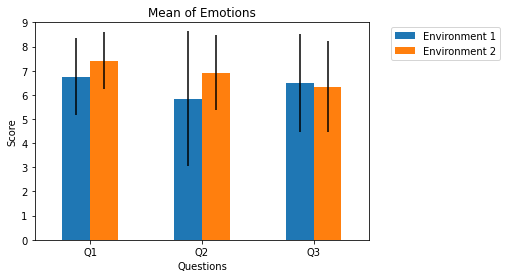

In [39]:
env_mean_concat(df_num_emotions, "Emotions", 9, 1, 3)

#### Usability 😊😫
Mapped using the [Likert scale](https://en.wikipedia.org/wiki/Likert_scale)

##### Questions:
* **Q4**: I thought the application was easy to use
* **Q5**: I thought the application was inconsistent
* **Q6**: I felt confident using the application

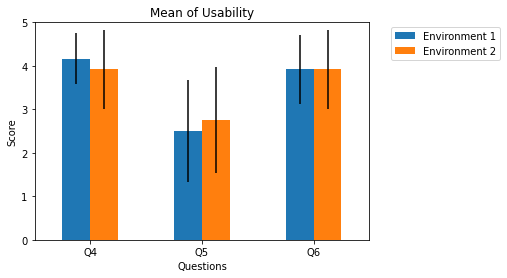

In [40]:
env_mean_concat(df_num_usability, "Usability", 5, 4, 7)

#### Immersion 😒😲
Mapped using the [Likert scale](https://en.wikipedia.org/wiki/Likert_scale)

##### Questions:
* **Q7**: I was immersed into the mobile screen environment
* **Q8**: I felt separated from the real-world environment
* **Q9**: I did not feel the need to look at anything other than the mobile screen
* **Q10**: The visuals of the virtual object were convincing
* **Q11**: I felt I could control the virtual object
* **Q12**: The virtual object blended nicely into the environment
* **Q13**: The object disappeared behind other real world objects
* **Q14**: I felt that I experienced the virtual object, rather than watching it

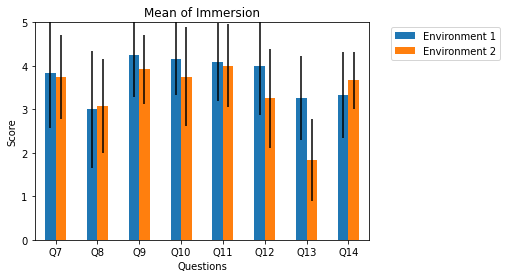

In [41]:
env_mean_concat(df_num_immersion, "Immersion", 5, 7, 14)

#### Experience 🤓😎
Mapped using the [Likert scale](https://en.wikipedia.org/wiki/Likert_scale)

##### Questions:
* **Q15**: I enjoyed the overall experience with the application
* **Q16**: I would like to try the application, or similar applications again

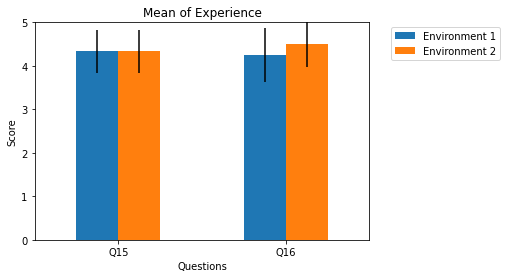

In [54]:
env_mean_concat(df_num_experience, "Experience", 5, 15, 16)

## Statistical threshold 🔬⚗️🧮

We also need to check if there is any statistical significance to any of the differences in environemnt 1 or 2

A test with the a [Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann–Whitney_U_test) library can be used to easily check p-value against an alpha value

In [58]:
from scipy.stats import mannwhitneyu

def mannwhitneyu_test(dataframe_name, alpha):
  stat, p = mannwhitneyu(
      dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 1'].mean().rename('Environment 1'), 
      dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 2'].mean().rename('Environment 2')
      )
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  if p > alpha:
    print('Keep H0,    p   >   alpha')
    print('          %.3f     %.3f' % (p, alpha))
  else:
    print('Reject H0,    p   <   alpha')
    print('            %.3f     %.3f' % (p, alpha))

  
mannwhitneyu_test(df_num_experience, 0.25)

Statistics=0.500, p=0.207
Reject H0,    p   <   alpha
            0.207     0.250


Function returning all of the p-values in an given dataset and appending them to an array

In [45]:
def mannwhitneyu_p_values(dataframe_name):
  p_values = []

  df_env1 = dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 1']
  df_env2 = dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 2']

  for i in range(1, len(df_env1.columns)):
    stat, p = mannwhitneyu(df_env1.to_numpy()[:, i], df_env2.to_numpy()[:, i])
    #print('%.0f: Statistics = %.3f,  p = %.3f' % (i, stat, p))

    p_values.append(round(p, 3))

  print(p_values)
  #return p_values

Function to get the means from the environments and comparing their delta

In [46]:
import statistics

def env_mean(dataframe_name):
  df_env1 = dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 1']
  df_env2 = dataframe_name[dataframe_name['What environment did you use during the experiment?'] == 'Environment 2']
  
  env1_mean = []
  env2_mean = []

  for i in range(1, len(df_env1.columns)):
    env1_mean.append(round(statistics.mean(df_env1.to_numpy()[:, i]), 3))
    env2_mean.append(round(statistics.mean(df_env2.to_numpy()[:, i]), 3))

  print(env1_mean)
  print(env2_mean)

  delta_mean = np.subtract(env1_mean, env2_mean)

  print(delta_mean)
  #return env1_mean, env2_mean, delta_mean

In [47]:
def means_and_pvalues(dataframe_name):
  env_mean(dataframe_name)
  mannwhitneyu_p_values(dataframe_name)


### Emotions Means and P-values

In [48]:
means_and_pvalues(df_num_emotions)

[6.75, 5.833, 6.5]
[7.417, 6.917, 6.333]
[-0.667 -1.084  0.167]
[0.155, 0.288, 0.43]


### Usability Means and P-values 

In [49]:
means_and_pvalues(df_num_usability)

[4.167, 2.5, 3.917]
[3.917, 2.75, 3.917]
[ 0.25 -0.25  0.  ]
[0.279, 0.339, 0.5]


### Immersion Means and P-values

In [50]:
means_and_pvalues(df_num_immersion)

[3.833, 3, 4.25, 4.167, 4.083, 4, 3.25, 3.333]
[3.75, 3.083, 3.917, 3.75, 4, 3.25, 1.833, 3.667]
[ 0.083 -0.083  0.333  0.417  0.083  0.75   1.417 -0.334]
[0.324, 0.406, 0.109, 0.203, 0.426, 0.06, 0.001, 0.219]


### Experience Means and P-values

In [51]:
means_and_pvalues(df_num_experience)

[4.333]
[4.333]
[0.]
[0.486]
